# 💻 UnpackAI DL201 Bootcamp - Week 1 - Concepts: Broadcasting

## 📕 Learning Objectives

* To apply the index and broadcast method to tabular data to perform simple ***data cleaning*** tasks
* To use the index and broadcast method for ***edge detection*** and applying ***filters*** to image data
* To use our indexed NLP data and broadcast basic cleaning operations to it to pave the road to getting basic statistics. 


# Introduction
<hr style="border:4px solid gray"> </hr>

### Broadcasting

A big misconception on coding is that everything is made of for loops and if statements. In this mindset, the program flows from top to bottom, and the state of every variable is very important.

However, it is not the only way to approach a problem. One benefit of python is that it is multi-paradigm, and very flexible. Let's leave these preconceptions behind, and it will enhance our understanding of AI. 

This old approach of programming doesn't work very well with large dataframes or tensors because it would be very slow to work with samples one by one, top to bottom. Since, the order we do the calculations isn't important across each column and because most element are independant to each other, we can work on them all at once thanks to ***parallel computing*** !

The rules for this are explained using a type of linear algebra called broadcasting, which is how we can do math using different shapes. 

### Goals

1. To grasp the potential power of broadcasting as a fast, and efficient method from a code first perspective to manipulate vast amounts of number and text data without writing loops.

2. To get the skills to be able to apply the principles of indexing and broadcasting together in your project.

# Part 0 : code preparation

In [1]:
import pandas as pd
import numpy as np
import cv2 
import torch as t
from matplotlib import pyplot as plt
from pathlib import Path
import os

# import data and images if necessary, and choose the right path
PLATFORM = 'Kaggle'  # or 'UNIX' or 'Kaggle'

if PLATFORM == 'Kaggle':
    !pip install openpyxl
    !git clone https://github.com/unpackAI/DL201.git
    IMAGE_DIR = Path('/kaggle/working/DL201/img')
    DATA_DIR = Path('/kaggle/working/DL201/data')
    
elif PLATFORM == 'UNIX':
    # we assume that you already cloned unpackAI/DL201 git repository
    # and this notebook is part of DL201/week1 directory
    DATA_DIR = Path.home()/'Datasets/unpackAI/DL201/data'
    IMAGE_DIR = Path.home()/'Projects/unpackAI/DL201/img'
    
elif PLATFORM == 'WINDOWS':
    # we assume that you already cloned unpackAI/DL201 git repository
    # and this notebook is part of DL201/week1 directory
    DATA_DIR = Path('../data') #uncomment for kaggle
    IMAGE_DIR = Path('../img') #Uncomment for Kaggle
    
# finally, check if we found the right pathes
if os.path.isdir(DATA_DIR):
    print(f'DATA_DIR is a directory, its path is {DATA_DIR}')
else:
    print("ERROR : DATA_DIR is not a directory")

if os.path.isdir(IMAGE_DIR):
    print(f'IMAGE_DIR is a directory, its path is {IMAGE_DIR}')
else:
    print("ERROR : IMAGE_DIR is not a directory")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 1.5 MB/s eta 0:00:00a 0:00:01
Cloning into 'DL201'...
remote: Enumerating objects: 856, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 856 (delta 81), reused 76 (delta 45), pack-reused 725
Receiving objects: 100% (856/856), 55.76 MiB | 26.62 MiB/s, done.
Resolving deltas: 100% (503/503), done.
DATA_DIR is a directory, its path is /kaggle/working/DL201/data
IMAGE_DIR is a directory, its path is /kaggle/working/DL201/img


Below is a code used to create the graphs and pictures used in this notebook. You do not need to understand what it does, so you can just go to Part 1.

In [2]:
## Iteractive graphs of shapes

def plot_all_compatible_shapes(data, figure_size=10):
    
    """
    Takes a 3D or 2D Numpy array, then visualizes it 
    on matplotlib
    
    """
    
    # If someone inputs a dataframe, this will show up
    example_df = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
    
    if (data.shape[0] > 10 ) | (data.shape[1] > 10) & ( len(data.shape) < 3):
        data = example_df
    
    plot_size = sum(list(data.shape)) + 2 
    
    x_index = plot_size
    y_index = plot_size
    z_index = plot_size
    
    x, y, z = np.indices((x_index, y_index, z_index))
    
    if (len(data.shape) > 3):
        print('too many dimensions')

    if len(data.shape) == 3:
            
        shape = (x < data.shape[0]) & (y < data.shape[1]) & (z < data.shape[2])
            
        compatible_shape3D = (x >= x_index - data.shape[0]) & (y >= y_index - data.shape[1]) & ( z >= z_index - data.shape[2])
        
        ### 2D shapes 
       
        compatible_shape2D_side1 = (x < data.shape[0])  & (y >= y_index - data.shape[1]) & (z >= z_index - 1 )
        
        ## Creates a side by offsetting it next to side 1
        ## Then removes the x asis
        # Preserves y and z
        
        offset = 2
        
        shape2yAxisEnd = y_index - data.shape[1] - offset 
        shape2yAxisBegin = shape2yAxisEnd - data.shape[1] - 1
            
        z_bounds = (z >= z_index - (data.shape[2]))
        y_bounds = ((shape2yAxisBegin < y ) & (y < shape2yAxisEnd))   
        x_bounds = (x < 1 )
    
        compatible_shape2D_side2 = x_bounds & y_bounds & z_bounds

        # Elevates original shape to top of Graph, then flattens y axis to 1
        
        compatible_shape2D_side3 = (x < data.shape[0]) & (y < 1) & (z >= (z_index - data.shape[2]))
        
        ### 1D shapes
        
        # Interested in length
        compatible_shape1D_length = (x >= x_index - data.shape[0]) & (y < y_index- (y_index - 1)) & (z < z_index - (z_index - 1 ) )
        compatible_shape1D_width = (x >= x_index - 1) & (y < y_index- (y_index - data.shape[1])) & (z < z_index - (z_index - 1 ) )
        compatible_shape1D_height = (x >= x_index - 1) & (y < y_index- (y_index - 1)) & (z <  data.shape[2] )
        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )

        # combine the objects into a single boolean array
        
        voxelarray = shape | compatible_shape3D | compatible_shape2D_side1 | compatible_shape2D_side2 | compatible_shape2D_side3 | compatible_shape1D_length | compatible_shape1D_width | compatible_shape1D_height | scalar
        
        colors = np.empty(voxelarray.shape, dtype=object)
        
        colors[shape] = 'blue'
        colors[compatible_shape3D] = 'green'
        colors[compatible_shape2D_side1] = 'red'
        colors[compatible_shape2D_side2] = 'yellow'
        colors[compatible_shape2D_side3] = 'cyan'
        colors[compatible_shape1D_length] = 'orange'
        colors[compatible_shape1D_width] = 'magenta'
        colors[compatible_shape1D_height] = 'violet'
        colors[scalar] = 'purple'

    elif len(data.shape) == 2:
        
        shape = (x < data.shape[0]) & (y < data.shape[1]) & (z < 1)
        
        compatible_shape2D = (x < data.shape[0])  & (y >= y_index - data.shape[1]) & (z >= z_index - 1 )
        compatible_shape1D_length = (x >= x_index - data.shape[0]) & (y < y_index- (y_index - 1)) & ((round(plot_size/2) < z ) & (z <= round(plot_size/2) + 1))
        compatible_shape1D_width = (x >= x_index - 1) & (y < y_index- (y_index - data.shape[1])) & (z < z_index - (z_index - 1 ) )
        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )
        
        # combine the objects into a single boolean array

        voxelarray = shape | compatible_shape2D | compatible_shape1D_length | compatible_shape1D_width | scalar
        
        colors = np.empty(voxelarray.shape, dtype=object)

        colors[shape] = 'blue'
        colors[compatible_shape2D] = 'red'
        colors[compatible_shape1D_length] = 'orange'
        colors[compatible_shape1D_width] = 'magenta'
        colors[scalar] = 'purple'
 
    else:
        print('1')
        shape = (x < data.shape[0]) & (y < 1) & (z < 1)
        
        #compatible_shape1D_length = (x >= data.shape[0]) & (y <  1) & (z < 1 )
        compatible_shape1D_width = (x >= x_index - 1) & (y < y_index- (y_index - data.shape[0])) & ((round(plot_size/2) < z ) & (z <= round(plot_size/2) + 1))#(round(plot_size/2) < z <= (round(plot_size/2) + 1) )

        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )
        
        # combine the objects into a single boolean array
     
        voxelarray = shape | compatible_shape1D_width | scalar

        # combine the objects into a single boolean array

        # set the colors of each object
        colors = np.empty(voxelarray.shape, dtype=object)
        
        colors[shape] = 'blue'
        colors[compatible_shape1D_width]  = 'magenta'
        colors[scalar] = 'purple'

    ax = plt.figure(figsize=(figure_size,figure_size)).add_subplot(projection='3d')
    ax.voxels(voxelarray, facecolors=colors, edgecolor='k')
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    plt.show()


In [3]:
def plot_compatible_shapes_simple(data,figure_size=10):
    
    """
    Shows a simple example to show the broadcasting rules 
    You can multiple a shape by any of it's edges or sides
    
    
    """
    # Sets up a 3D  space as large as all the dimensions summed with 1 as a buffer
    
    plot_size = sum(list(data.shape)) + 2 
    
    x_index = plot_size
    y_index = plot_size
    z_index = plot_size
    
    x, y, z = np.indices((x_index, y_index, z_index))
    
    # Sets up conditions to use
    
    if (len(data.shape) > 3):
        print('too many dimensions')

    if len(data.shape) == 3:
            
        shape = (x < data.shape[0]) & (y < data.shape[1]) & (z < data.shape[2])
             
        compatible_shape3D = (x >= x_index - data.shape[0]) & (y >= y_index - data.shape[1]) & ( z >= z_index - data.shape[2])
        compatible_shape2D = (x < data.shape[0])  & (y >= y_index - data.shape[1]) & (z >= z_index - 1 )
        compatible_shape1D = (x >= x_index - data.shape[0]) & (y < y_index- (y_index - 1)) & (z < z_index - (z_index - 1 ) )
        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )

        # combine the objects into a single boolean array
        
        voxelarray = shape | compatible_shape3D | compatible_shape2D | compatible_shape1D | scalar
        
        colors = np.empty(voxelarray.shape, dtype=object)
        
        colors[shape] = 'blue'
        colors[compatible_shape3D] = 'green'
        colors[compatible_shape2D] = 'red'
        colors[compatible_shape1D] = 'orange'
        colors[scalar] = 'purple'

    elif len(data.shape) == 2:
        
        shape = (x < data.shape[0]) & (y < data.shape[1]) & (z < 1)
        
        compatible_shape2D = (x < data.shape[0])  & (y >= y_index - data.shape[1]) & (z >= z_index - 1 )
        compatible_shape1D = (x >= x_index - data.shape[0]) & (y < y_index- (y_index - 1)) & (z < z_index - (z_index - 1 ) )
        scalar = (x >= x_index - 1) & (y < 1 ) & (z >= z_index - 1 )
        
        # combine the objects into a single boolean array

        voxelarray = shape | compatible_shape2D | compatible_shape1D | scalar
        
        colors = np.empty(voxelarray.shape, dtype=object)

        colors[shape] = 'blue'
        colors[compatible_shape2D] = 'red'
        colors[compatible_shape1D] = 'orange'
        colors[scalar] = 'purple'
        
        print()

    else:
        shape = (x < data.shape[0]) & (y < 1) & (z < 1)
        scalar = (x >= x_index - 1) & (y < y_index - (y_index -1 ) ) & (z >= z_index - 1 )
        
        # combine the objects into a single boolean array

        voxelarray = shape | scalar

        # combine the objects into a single boolean array

        # set the colors of each object
        
        colors = np.empty(voxelarray.shape, dtype=object)

        colors[shape] = 'blue'
        colors[scalar] = 'purple'

    ax = plt.figure(figsize=(figure_size,figure_size)).add_subplot(projection='3d')
    ax.voxels(voxelarray, facecolors=colors, edgecolor='k')
    
    plt.show()
    
    # prints out compatible shapes


In [4]:
# picture display function
def PictureDisplay(picture_path):
    image_file_path = str(IMAGE_DIR/picture_path)
    img = cv2.imread(image_file_path)
    img_array = np.array(img)
    plt.imshow(img_array)
    plt.show()
# make the picture bigger
plt.rcParams['figure.figsize'] = [15, 15]

# Part 1: Broadcasting Rules  

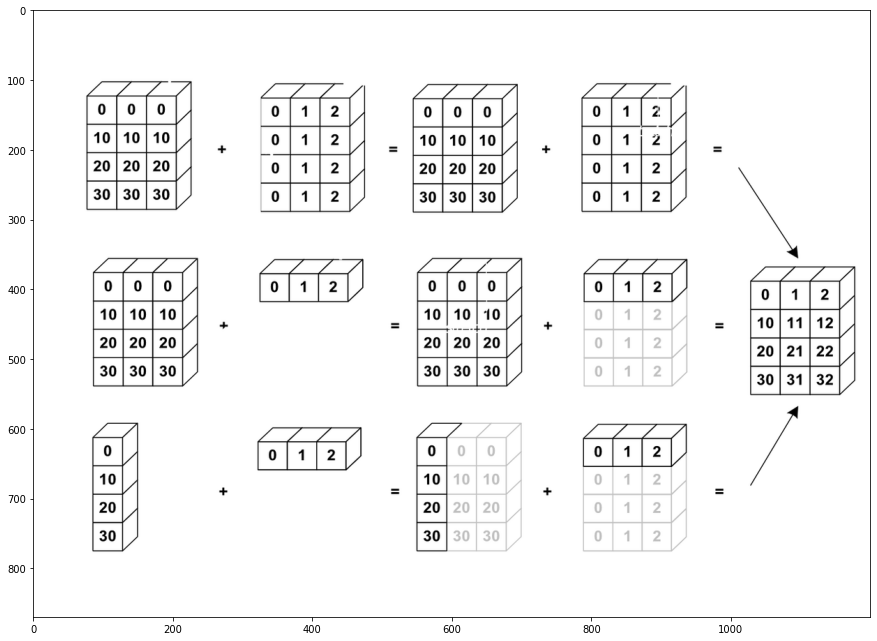

In [5]:
PictureDisplay('week1/broadcastingArrays.png')

When we are going to do operations on 1D+ objects, the broadcasting rules are very critical to keep in mind.

The following function visualizes them in a graph. For tensors to be compatible, they need to either be the same exact shape, or share a common side, edge, or corner. 


The following function graphs out these rules visually. If we input a 2D rectangle into this, we can either use the exact same rectangle with different values inside of it. Or we can use a shape that matches one of the sides. 

This becomes important because no matter if we are handling data in dataframes, images, or layers in a neural network, they are still beholden to this rule.

In [6]:
# Gives some basic numpy array based shapes

line = np.array([1,1,1]) #1D Line
square = np.array([[1,1,1],[1,1,1],[1,1,1]])
cube = np.array([square,square,square])
box = np.array([square,square,square,square,square])

rectangle = np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1]])
long_box = np.array([rectangle,rectangle,rectangle,rectangle,rectangle,rectangle])


Not only can one surface or edge be compatible, but any of them will be compatible. In most dataframes, it is a matter of applying an operation either by the length or the width of the dataframe. This is relatively intuitive, because if you input an array that is not compatible with the other side, then, when it reaches the point when one array is longer than the other there will be nothing for it to do. 

These are all the compatible shapes that fit with this box. When it is visualized it can be easier to see than explaining it using words.


In [7]:
#plot_compatible_shapes_simple(line)
#plot_compatible_shapes_simple(square)
#plot_compatible_shapes_simple(cube)

# Part 2 : Broadcasting in Tabular Data
<hr style="border:2px solid gray"> </hr>

Now that we know how to access ***Tabular Data*** through ***indexing***, we can apply the same idea of ***broadcasting*** to use what can be called ***vectorized operations***.

Here again, we will be able to perform operations on single elements, lines or the entire tables easily thanks to the automatation made by Pandas library.

Here, we will focus on an example : the ***.str*** method in pandas

---

The .str method of a Pandas Series is extremely useful. In one single line, it can do many things that would require writing a loop in pure python.

The principle here stands in two steps:

* Step 1: Index 

Pass pandas an index and tell it which data you are selecting

* Step 2: Apply

Give instructions to apply to the indexed data points. 

## 2.1 Converting data types: text to numbers
<hr style="border:1px solid gray"> </hr>

For this notebook, we will be using this dataset : https://www.kaggle.com/arindam235/startup-investments-crunchbase

It was collected from kaggle. It is an easy to use text and numerical tabular data set, which contains plenty of messy and missing data that we can clean up. More information can be found about it on Kaggle.

Often, when one loads data into a pandas dataframe, it will often read a number as text when there are non numerical characters in the column. Sometimes, solving the problem can be as straightforward as applying the ***.astype()*** method to convert it, but usually there is a reason why it was considered as a string, so we need to find it.
One of the best ways to do so it to rely on the Python error messages. Using this is much more efficient than manually checking the data row by row.

To do this, there are many python ***.str*** methods which are available to process the data.

Right below, we will go over the following Pandas methods :

* .str.replace()
* .str.strip()

and using numpy, which forms the backbone of our understanding of how to get the most out of Pandas, with the famous method :

* np.where()


In [8]:
# Let's load the data (already in our local Data directory)
startupDataPath = DATA_DIR/'StartUpInvestments/investments_VC.csv'
# Let pandas library read it, we tell pandas that the file is csv file
startups_df = pd.read_csv(startupDataPath,encoding = 'unicode_escape')

In [9]:
print(f'before : {startups_df.columns}')
# This removes whitespace in the columns names (using list comprehension)
startups_df.columns = [col.strip() for col in list(startups_df.columns)]
print(f'after : {startups_df.columns}')

before : Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')
after : Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_

In [10]:
# Let's cull down our dataset to the more complete entries
startups_df.dropna(inplace=True,axis=0) 
#without inplace=True, we would create a copy of the dataframe
# and would need to assign it to another variable

In [11]:
startups_df.sample(5, random_state=1)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
37536,/organization/senergen-devices,Senergen Devices,http://www.senergendevices.com,|Clean Technology|,Clean Technology,"25,00,000",closed,USA,CA,SF Bay Area,...,0.0,0.0,0.0,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0
18339,/organization/halfpenny-technologies,Halfpenny Technologies,http://www.halfpenny.com,|Health Care|,Health Care,"48,50,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42918,/organization/the-veteran-advantage,The Veteran Advantage,http://www.TheVeteranAdvantage.org,|Clean Technology|,Clean Technology,"9,100",operating,USA,CA,Ontario - Inland Empire,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18890,/organization/here-inc-2,HERE Inc,http://here-inc.com/,|Apps|,Apps,"17,000",operating,USA,WA,Seattle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48560,/organization/yippeeo-internet-marketing-solut...,YippeeO Internet Marketing Solutions,http://www.YippeeOMarketing.com,|Web Design|Semantic Search|Email Marketing|In...,Web Design,"20,00,000",operating,USA,VA,VA - Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cleansing text data with pandas

One of the key features of pandas is what you can do using strings. If you can understand how to utilize this, you can automate tons of office work, potentially saving hours each week from tedious and repetative tasks.

It is very possible to automate many tasks if you can understand how to process text data in pandas.

In this case, the column labelled ***funding_total_usd'*** was inputted as text instead of numbers.
We can see it with ***type()*** function :

In [12]:
type(startups_df['funding_total_usd'][0])

str

To solve it, we can try to force pandas to read it as a number with ***astype*** method.

In [13]:
#startups_df['funding_total_usd'] = startups_df['funding_total_usd'].astype(np.int64)

This line will run an error, and will give you the first value where your operation failed. 
Why did this fail and how does the following line fix it? 

In [14]:
startups_df['funding_total_usd'] = startups_df['funding_total_usd'].str.replace(',','')

##### Series.str.replace()

This can allow you to replace a character or a set of characters quite easily. 

Pandas handles text quite well, and is full of methods which can be found in the documentation or through an internet search. 

Here is a link to the documentation which will give you an overview: https://pandas.pydata.org/pandas-docs/version/0.23.4/text.html

This link is to the documentation to all of the functionality for pandas strings. If you need to do deal with strings, this will become your best friend !

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html


Let's try to run the code again. Now that we have this, it should work

In [15]:
#startups_df['funding_total_usd'] = startups_df['funding_total_usd'].astype(np.int64)

Wow, we get another error, what should we do !??
Fortunately, it comes with a useful ***error message***. It shows that there is whitespace in this element of the pandas series.
We can use the ***.str.strip()*** method to easily remove whitespaces, using only one line of code.

Most published notebooks that one will come across are gleaming with code that runs perfectly. However, to get to that point, it is these error messages from the python interpreter which will lead the way. It is much easier to have the interpreter find these discrepancies than to check it manually.

In [16]:
startups_df['funding_total_usd'] = startups_df['funding_total_usd'].str.strip()

Now, let's use ***np.where*** to replace the hyphens '-' by 0.

This is very similar to Excel IF formula. It could be explained as :

<em>for each data A on the column 'funding_total_usd', if A equals to '-', then replace it by 0, otherwise, keeps the original value</em>

A = np.where ( ***condition***, ***value if true***, ***value if false*** )

In [17]:
startups_df['funding_total_usd'] = np.where(startups_df['funding_total_usd'] == '-', 0, startups_df['funding_total_usd'])

In [18]:
startups_df['funding_total_usd'] = startups_df['funding_total_usd'].astype(np.int64)

Now it works. Luckily for us, there were no more errors. 

When dealing with large amounts of data, it is not only impractical, but often impossible to check each value one by one. 
Instead, we can rely on the python interpreter to find these errors.

Although error messages contain some esoteric wordings, generally, data exploration proceeds with encountering errors like this and we should learn to ignore most part of it, and go to the core problem, which will help us to find the answer to our problem.

## 2.1 Adding a feature calculated from existing ones
<hr style="border:1px solid gray"> </hr>

Using the concept of broadcasting and indexing, we can create a new column based on the content of other columns. This is really important to create new knowledge based on what we already know. Then, this new knowledge could make it much easier for the machine learning model to find correlations.

In [19]:
startups_df.sample(5, random_state=1)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
37536,/organization/senergen-devices,Senergen Devices,http://www.senergendevices.com,|Clean Technology|,Clean Technology,2500000,closed,USA,CA,SF Bay Area,...,0.0,0.0,0.0,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0
18339,/organization/halfpenny-technologies,Halfpenny Technologies,http://www.halfpenny.com,|Health Care|,Health Care,4850000,operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42918,/organization/the-veteran-advantage,The Veteran Advantage,http://www.TheVeteranAdvantage.org,|Clean Technology|,Clean Technology,9100,operating,USA,CA,Ontario - Inland Empire,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18890,/organization/here-inc-2,HERE Inc,http://here-inc.com/,|Apps|,Apps,17000,operating,USA,WA,Seattle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48560,/organization/yippeeo-internet-marketing-solut...,YippeeO Internet Marketing Solutions,http://www.YippeeOMarketing.com,|Web Design|Semantic Search|Email Marketing|In...,Web Design,2000000,operating,USA,VA,VA - Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In Pandas, it is very straightforward to add  columns together. Since the columns are the same shape, they obey the broadcasting rules. 

In [20]:
startups_df['round_D+'] = startups_df['round_D'] + startups_df['round_E'] + startups_df['round_F'] + startups_df['round_G'] + startups_df['round_H']

# Part 3 : Brodcasting in Image Data
<hr style="border:2px solid gray"> </hr>

In this section, we are going to show how broadcasting is implimented using image data. This can be done in a couple of ways. It can be applied across an entire image or with only a section of the image.

This principle can be applied from something as simple as seperating a color channel, to applying filters and doing edge detection.

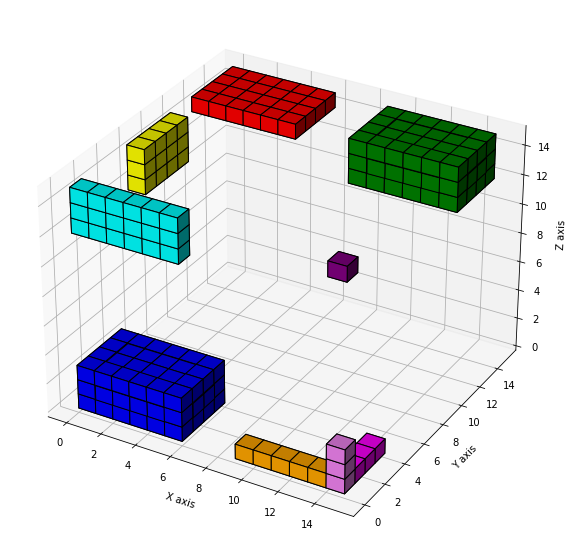

In [21]:
plot_all_compatible_shapes(long_box)

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# build the image path
image_file_path = str(IMAGE_DIR/'week1/highway.jpg') #opencv can't accept Path lib so a string is needed instead
# read the image with opencv
img = cv2.imread(image_file_path)

In [23]:
# check the shape of the image
print(img.shape)

(640, 960, 3)


In [24]:
# make the picture small again
plt.rcParams['figure.figsize'] = [5, 5]

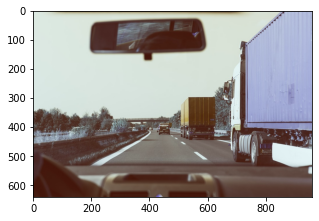

In [25]:
img_array = np.array(img)
plt.imshow(img_array)
plt.show()
# http://omz-software.com/pythonista/matplotlib/users/image_tutorial.html

## 3.1 Separating color channels

Here, let's try to broadcast a number to this array. Let's try this with the number zero.
What will happen to this image if we broadcast the number zero to it? 



In [26]:
zero_array = img_array * 0

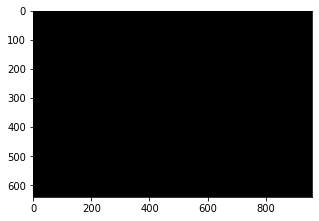

In [27]:
plt.imshow(zero_array)
plt.show()

It is not suprising that everything turned black. However, this is a bit crude. Let's increase the complexity of what we are doing and try to seperate out the color channels
What do you think will happen if we do this?


In [28]:
red_array = img_array * [1,0,0]
# matrix * vector sharing one common dimmension

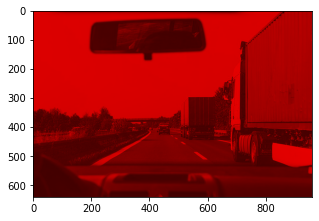

In [29]:
plt.imshow(red_array)
plt.show()

Can you seperate out the blue or green channel?

***Bonus***: Try to mess around with the values and see what happens, see if you can invent a new instagram filter

In [30]:
redValue = 0.2
greenValue = 0.4
blueValue = 0.9

fun_array = img_array * [redValue,greenValue,blueValue]
fun_array = np.array(fun_array.round(),dtype='uint8')
print(fun_array.max())

230


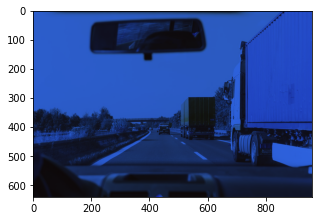

In [31]:
plt.imshow(fun_array)
plt.show()

## 3.2 Applying a mask to an image

If you want to expand, let's try to hide half the picture. First, we create a vector of 0 and 1. It will be used to tell which line must be hidden.

In [32]:
image_height = img_array.shape[0]
Zeros = np.zeros(image_height//2, dtype='uint8')
Ones = np.ones(image_height//2, dtype='uint8')
HalfZeroHalfOneArray = np.concatenate((Zeros, Ones), axis = 0)
HalfZeroHalfOneArray.shape

(640,)

Let's try to multiply this vector to the image.

In [33]:
#new_array = HalfZeroHalfOne * img_array

There is a problem, python was not able to multiply them because one was defined in 1D space while the other was defined into 3D space. We need to expand our array into 3D space.

In [34]:
HalfZeroHalfOne3D = np.broadcast_to(HalfZeroHalfOneArray,(1,1,640))

In [35]:
HalfZeroHalfOne3D.shape

(1, 1, 640)

In [36]:
img_array.shape

(640, 960, 3)

In [37]:
#new_array = HalfZeroHalfOne3D * img_array

The problem we have here is that the values do not match  exactly. These need to match down to the number, or it doesn't work 

The reason why is goes back to where the vector is. If the large value is in the x dimension, that means that it is pointing in that direction. If it is in the y dimension, it is pointing that way, and it is pointing here in the graph below.

Let's transpose our matrix, and see what we can do.

In [38]:
HalfZeroHalfOne3D = HalfZeroHalfOne3D.T
HalfZeroHalfOne3D.shape

(640, 1, 1)

In [39]:
new_array = img_array * HalfZeroHalfOne3D

Now it works, let's plot it out.

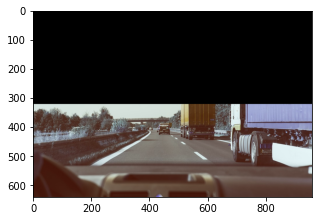

In [40]:
plt.imshow(new_array)
plt.show()

Why did it do this? 

## 3.3 Image Smoothing

Smoothing, which is color averaging is done automatically by our eyes. An image that may appear gray to us, might acually be a soup of black and white pixels that average out to us as grey.

This can present a real problem when trying to identify different parts of an image. Since there is a wide range of colors, it will affect the ability of the Computer Vision algorithms to pick up patterns throughout this noise. 

Luckily, we can apply this concept of broadcasting to the image in order to average out the pixel values and get a more stable image.

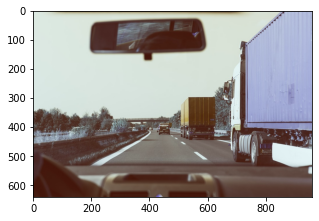

In [41]:
plt.imshow(img_array)
plt.show()

OpenCV is a tool in python that allows us to work with images in myriad ways. One of the first methods we can learn about are ***filters***. We can apply a ***Gaussian blur*** filter to an image like this. 

In [42]:
gaussianBlurImg = cv2.GaussianBlur(img,(15,15),0)

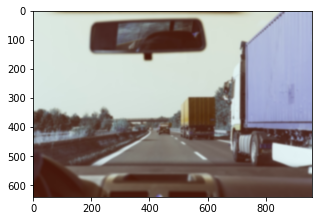

In [43]:
plt.imshow(gaussianBlurImg)
plt.show()

What if we apply it 10 times ?

In [44]:
for i in range(10):
    gaussianBlurImg = cv2.GaussianBlur(gaussianBlurImg,(15,15),0)

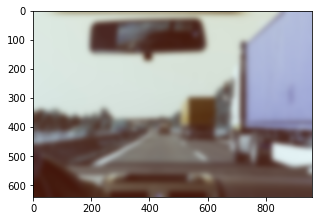

In [45]:
plt.imshow(gaussianBlurImg)

This is an extreme example of a Gaussian blur, because it destroys a lot of details in the image. But when applied lightly, it can help to even out the pixel values to eliminate noise. This is the most common filter that can be used.

OpenCV can save us a lot of time compared to implimenting the code ourselves.

The following article explain the concepts more in depth.

* Higher level Concepts: https://www.pixelstech.net/article/1353768112-Gaussian-Blur-Algorithm


If you would like to see what happens under the hood by implimenting a filter by hand, this website is a good place to start.

* Code Implimentation: http://www.adeveloperdiary.com/data-science/computer-vision/applying-gaussian-smoothing-to-an-image-using-python-from-scratch/

## 3.4 Edge Detection

Another extension of this same idea allows us to detect edges. In an image, the edges show up as sharp differences in pixel values. One color may show up differently than another. an edge detection kernel is designed to pick these up. 

An edge detection algorithm returns a white pixel where there are differences in color, and a black pixel where the pixels around it are similar in color.

The first step in doing this is to convert the image intto grayscale. This will simplify the following steps because we'll be dealing with a 2D matrix instead of a 3D Array. We aren't losing any information because it is looking for differences which will still be apparent in a grayscale. 

### Step 1 : convert to grayscale

In [46]:
grayscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscale_img.shape

(640, 960)

The following graph illustrates the differences in pixel values in different parts of the image. matplot lib is shown here because using different colors for shades of gray makes it makes the edges even more apparent to us. 

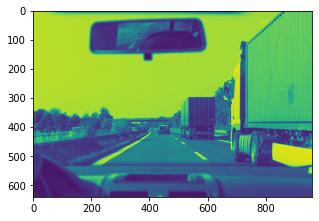

In [47]:
plt.imshow(grayscale_img)
plt.show()
# Let's remark than by default, pillow library uses color to display grayscale images.

In [48]:
edges = cv2.Canny(grayscale_img, threshold1=30, threshold2=100)

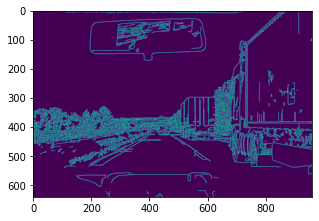

In [49]:
plt.imshow(edges)
plt.show()

In [50]:
blurredGrayscaleImage = cv2.GaussianBlur(grayscale_img,(11,11),0)

When we blur the image, it can cause the features to come out much more clearly because the noise in the trees and trucks are averaged  out in a way that eliminates the noise. 

In [51]:
edges = cv2.Canny(blurredGrayscaleImage, threshold1=30, threshold2=100)

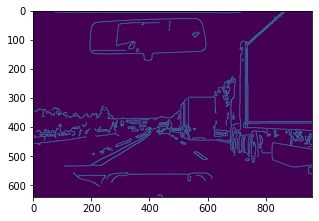

In [52]:
plt.imshow(edges)
plt.show()

# Part 4 : Discussions - Questions
## 4.1 Multiple Answers Questions

1. What is broadcasting? 

    *  A. Higher Dimensional math <br></br>

    *  B. Mathematical operations only between tensors of the same size <br></br>

    *  C. Mathematical operations between tensors that with a shape with dimensions (length,width, ect) which are identical, or are equal to 1. <br></br>

    *  D. Don't worry, Python takes care of the details <br></br>

2. Why is it faster to use vectorized operations than to iterate top to bottom, row by row?

    * A. It is more efficient, but doesn't offer the level of control and detail that for loops can offer. <br></br>

    * B. Numpy and Pandas use optimized C and Fortran Code which is always faster than Python. <br></br>

    * C. Since the order in which the operations are done isn't important, the array can be **processed at the same time** in a functional paradigm rather than **top down** in an imperative paradigm. <br></br>

    * D. Since the columns are quantifiable numbers, the Python interpreter doesn't have to slow down like it would for qualitative text data. <br></br>

3. What is the difference between tensor rank and shape? How do you get the rank from the shape? 

    * A. The shape refers to the number of dimensions in the tensor.
    <br></br>
    * B. The rank refers to the number of items in each dimension of the tensor.
    <br></br>
    * C. The shape refers to the number of items in each dimension of the tensor.
    <br></br>
    * D. The rank is equal to the number of numbers in the shape of the tensor.




## 4.2 Exercises
<hr style="border:2px solid gray"> </hr>

### 4.2.1 Exercise on Kaggle

The code example below illustrates the usage of numeric and conditional indexing of multi-dimensional arrays.

Apply filters to the image using the openCV or PIL libraries.  This notebook provides an overview of different ways one can process images using opencv. Pick and choose what you find interesting or useful, and try to imagine how it is implemented.

https://www.kaggle.com/bulentsiyah/learn-opencv-by-examples-with-python/notebook

### 4.2.2 Pandas Exercises

Create a new feature in the dataset through using a technique called "binning." This makes a column with only true/false values thanks to ***.contains*** method, while highlighting different parts of the dataset 

In [53]:
#Step 1, go through the dataset and find something that may interest you

startups_df['category_list'].sample(5, random_state = 1)

37536                                   |Clean Technology|
18339                                        |Health Care|
42918                                   |Clean Technology|
18890                                               |Apps|
48560    |Web Design|Semantic Search|Email Marketing|In...
Name: category_list, dtype: object

In [54]:
#step 2, find out how many samples contain this phrase
startups_df['category_list'].str.contains('Entertainment').value_counts()

False    21524
True       316
Name: category_list, dtype: int64

In [55]:
#Step 3 assign a new column to the dataframe
startups_df['is_entertainment'] = startups_df['category_list'].str.contains('Entertainment')

## 4.3 Extension Ideas
<hr style="border:2px solid gray"> </hr>

Open up a dataset related to your area/areas of interest
and closely inspect what is in the dataset. See how you can apply these principles of vectorized operations. 